In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator as idm
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import warnings
#Supressing warnings
warnings.filterwarnings('ignore')

In [42]:
# Creating augmentation on training variable
train_flowers=idm(rescale=1./255,zoom_range=0.2,horizontal_flip=True)

# Passing training data to train variable
Xtrain = train_flowers.flow_from_directory('/content/drive/MyDrive/ibm/Flowers-Dataset/flowers',target_size=(76,76),class_mode='categorical',batch_size=100)

Found 4317 images belonging to 5 classes.


In [18]:

# Creating augmentation on testing variable
test_flowers=idm(rescale=1./255)

# Passing testing data to test variable
Xtest = test_flowers.flow_from_directory('/content/drive/MyDrive/ibm/Flowers-Dataset/flowers',target_size=(76,76),class_mode='categorical',batch_size=100)



Found 4317 images belonging to 5 classes.


In [43]:
Flower_model = Sequential()
Flower_model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(76,76,3)))
Flower_model.add(MaxPooling2D(pool_size=(2,2)))
Flower_model.add(Flatten())
Flower_model.add(Dense(300,activation='relu'))
Flower_model.add(Dense(150,activation='relu'))
Flower_model.add(Dense(5,activation='softmax'))

In [44]:
Flower_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
Flower_model.fit_generator(Xtrain,steps_per_epoch= len (Xtrain),epochs= 10,validation_data=Xtest,validation_steps= len (Xtest))

Epoch 1/10
44/44 [==============================] - 71s 2s/step - loss: 1.5202 - accuracy: 0.4109 - val_loss: 1.1428 - val_accuracy: 0.5258
Epoch 2/10
44/44 [==============================] - 71s 2s/step - loss: 1.0842 - accuracy: 0.5698 - val_loss: 1.1264 - val_accuracy: 0.5631
Epoch 3/10
44/44 [==============================] - 69s 2s/step - loss: 0.9894 - accuracy: 0.6176 - val_loss: 0.9964 - val_accuracy: 0.6189
Epoch 4/10
44/44 [==============================] - 69s 2s/step - loss: 0.9397 - accuracy: 0.6305 - val_loss: 0.8458 - val_accuracy: 0.6780
Epoch 5/10
44/44 [==============================] - 70s 2s/step - loss: 0.8708 - accuracy: 0.6669 - val_loss: 0.9011 - val_accuracy: 0.6602
Epoch 6/10
44/44 [==============================] - 69s 2s/step - loss: 0.8012 - accuracy: 0.6915 - val_loss: 0.8604 - val_accuracy: 0.6801
Epoch 7/10
44/44 [==============================] - 68s 2s/step - loss: 0.7484 - accuracy: 0.7107 - val_loss: 0.7811 - val_accuracy: 0.7040
Epoch 8/10
44/44 [==

In [30]:
Flower_model.save('flowers.h5')

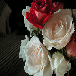

In [53]:
test_img2=image.load_img('/content/drive/MyDrive/ibm/Flowers-Dataset/flowers/rose/102501987_3cdb8e5394_n.jpg',target_size=(76,76))
test_img2

In [54]:
x=image.img_to_array(test_img2)
x=np.expand_dims(x,axis=0)
predicted=np.argmax(Flower_model.predict(x))
Prediction_category[predicted]

1/1 [==============================] - 0s 33ms/step


'rose'